This notebook aims at illustrating the bugs discussed in https://github.com/LSSTDESC/CLMM/issues/267
It is based on `CLMM/examples/demo_modeling_functionality.ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import clmm.modeling as mod
from astropy.cosmology import FlatLambdaCDM

In [2]:
astropy_cosmology_object = FlatLambdaCDM(H0=70, Om0=0.27, Ob0=0.045)
cosmo_ccl = mod.cclify_astropy_cosmo(astropy_cosmology_object)

In [3]:
def plot_profile(r, profile_vals, profile_label='rho', label=None):
    plt.loglog(r, profile_vals, label=label)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

In [4]:
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass = 1.5e14
cluster_concentration = 4
z_cl = 0.2
z_source = 2
ngals = 1000

## Testing different radius types

In [5]:
r1 = 1.
r2 = 1
r3 = np.logspace(-2, 2, 100)
r4 = np.loadtxt("../tests/data/numcosmo/radial_profiles.txt", usecols = 0)
r5 = np.loadtxt("../tests/data/numcosmo/radial_profiles.txt")[:,0]

In [6]:
print ("r1 :", type(r1))
print ("r2 :", type(r2))
print ("r3 :", type(r3), "r3[0]:", type(r3[0]))
print ("r4 :", type(r4), "r4[0]:", type(r4[0]))
print ("r5 :", type(r5), "r5[0]:", type(r5[0]))

r1 : <class 'float'>
r2 : <class 'int'>
r3 : <class 'numpy.ndarray'> r3[0]: <class 'numpy.float64'>
r4 : <class 'numpy.ndarray'> r4[0]: <class 'numpy.float64'>
r5 : <class 'numpy.ndarray'> r5[0]: <class 'numpy.float64'>


## Testing impact of different radius types on the `get_3d_density` modeling function

### Comparison between `int` and `float`

In [7]:
rho1 = mod.get_3d_density(r1, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [8]:
print (rho1)

9021260913416.271


In [9]:
rho2 = mod.get_3d_density(1, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [10]:
print (rho2)

9021260913416.271


###  => There is no warning but when the radius type is `int` instead of `float` the result is completely wrong.

### Comparison between different `'numpy.ndarray'`

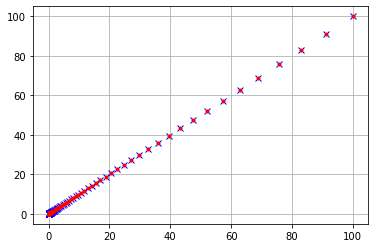

In [11]:
plt.plot(r3, r4, 'bx')
plt.plot(r3, r5, 'r.')
plt.grid()

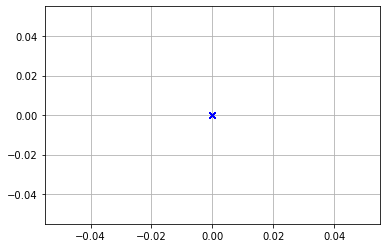

In [12]:
plt.plot(r3 - r5, r3 - r4, 'bx')
plt.grid()

###  => A priori, there is no differences betwen r3, r4 and r5

In [13]:
rho3 = mod.get_3d_density(r3, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [14]:
rho4 = mod.get_3d_density(r4, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

In [15]:
rho5 = mod.get_3d_density(r5, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo_ccl)

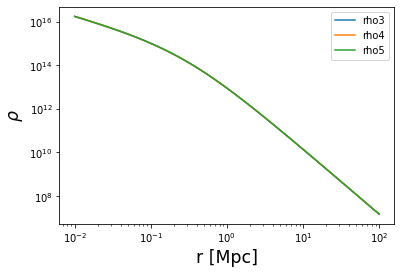

In [16]:
plot_profile(r3, rho3, '$\\rho$', "rho3")
plot_profile(r4, rho4, '$\\rho$', "rho4")
plot_profile(r5, rho5, '$\\rho$', "rho5")
plt.legend()

###  => There is no warning but with the definition of r5 the result is completely wrong.

## Testing impact of different radius types on the `predict_excess_surface_density` modeling function

In [17]:
mod.predict_excess_surface_density(r1, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array(36.52738825)

In [18]:
#uncoment to test that the kernel silently crashes
mod.predict_excess_surface_density(r2, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array(36.52738825)

In [19]:
mod.predict_excess_surface_density(r3, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array([1.88988364e+02, 1.88807827e+02, 1.88598587e+02, 1.88356416e+02,
       1.88076542e+02, 1.87753600e+02, 1.87381577e+02, 1.86953768e+02,
       1.86462724e+02, 1.85900218e+02, 1.85257206e+02, 1.84523813e+02,
       1.83689324e+02, 1.82742205e+02, 1.81670136e+02, 1.80460088e+02,
       1.79098425e+02, 1.77571050e+02, 1.75863592e+02, 1.73961647e+02,
       1.71851060e+02, 1.69518261e+02, 1.66950650e+02, 1.64137014e+02,
       1.61067980e+02, 1.57736488e+02, 1.54138261e+02, 1.50272249e+02,
       1.46141041e+02, 1.41751200e+02, 1.37113506e+02, 1.32243090e+02,
       1.27159419e+02, 1.21886150e+02, 1.16450818e+02, 1.10884375e+02,
       1.05220594e+02, 9.94953567e+01, 9.37458438e+01, 8.80096829e+01,
       8.23240740e+01, 7.67249431e+01, 7.12461556e+01, 6.59188244e+01,
       6.07707377e+01, 5.58259235e+01, 5.11043607e+01, 4.66218356e+01,
       4.23899372e+01, 3.84161784e+01, 3.47042218e+01, 3.12541916e+01,
       2.80630478e+01, 2.51250000e+01, 2.24319415e+01, 1.99738842e+01,
      

In [20]:
mod.predict_excess_surface_density(r4, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array([1.88988364e+02, 1.88807827e+02, 1.88598587e+02, 1.88356416e+02,
       1.88076542e+02, 1.87753600e+02, 1.87381577e+02, 1.86953768e+02,
       1.86462724e+02, 1.85900218e+02, 1.85257206e+02, 1.84523813e+02,
       1.83689324e+02, 1.82742205e+02, 1.81670136e+02, 1.80460088e+02,
       1.79098425e+02, 1.77571050e+02, 1.75863592e+02, 1.73961647e+02,
       1.71851060e+02, 1.69518261e+02, 1.66950650e+02, 1.64137014e+02,
       1.61067980e+02, 1.57736488e+02, 1.54138261e+02, 1.50272249e+02,
       1.46141041e+02, 1.41751200e+02, 1.37113506e+02, 1.32243090e+02,
       1.27159419e+02, 1.21886150e+02, 1.16450818e+02, 1.10884375e+02,
       1.05220594e+02, 9.94953567e+01, 9.37458438e+01, 8.80096829e+01,
       8.23240740e+01, 7.67249431e+01, 7.12461556e+01, 6.59188244e+01,
       6.07707377e+01, 5.58259235e+01, 5.11043607e+01, 4.66218356e+01,
       4.23899372e+01, 3.84161784e+01, 3.47042218e+01, 3.12541916e+01,
       2.80630478e+01, 2.51250000e+01, 2.24319415e+01, 1.99738842e+01,
      

In [21]:
#uncoment to test that the kernel silently crashes
mod.predict_excess_surface_density(r5, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo_ccl, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

array([1.88988364e+02, 1.88807827e+02, 1.88598587e+02, 1.88356416e+02,
       1.88076542e+02, 1.87753600e+02, 1.87381577e+02, 1.86953768e+02,
       1.86462724e+02, 1.85900218e+02, 1.85257206e+02, 1.84523813e+02,
       1.83689324e+02, 1.82742205e+02, 1.81670136e+02, 1.80460088e+02,
       1.79098425e+02, 1.77571050e+02, 1.75863592e+02, 1.73961647e+02,
       1.71851060e+02, 1.69518261e+02, 1.66950650e+02, 1.64137014e+02,
       1.61067980e+02, 1.57736488e+02, 1.54138261e+02, 1.50272249e+02,
       1.46141041e+02, 1.41751200e+02, 1.37113506e+02, 1.32243090e+02,
       1.27159419e+02, 1.21886150e+02, 1.16450818e+02, 1.10884375e+02,
       1.05220594e+02, 9.94953567e+01, 9.37458438e+01, 8.80096829e+01,
       8.23240740e+01, 7.67249431e+01, 7.12461556e+01, 6.59188244e+01,
       6.07707377e+01, 5.58259235e+01, 5.11043607e+01, 4.66218356e+01,
       4.23899372e+01, 3.84161784e+01, 3.47042218e+01, 3.12541916e+01,
       2.80630478e+01, 2.51250000e+01, 2.24319415e+01, 1.99738842e+01,
      

###  => There is no warning but with `int` or with the definition of r5, the function `predict_excess_surface_density` runs forever or silently crashes.